**AGE DETECTION USING DEEP LEARNING IN OPENCV**

**OBJECTIVE**: Our goal here is to create a program that will predict the gender and age of the person using an image.But predicting age might not be as simple,so classify the age into a specific range like 0-6,18-25, etc

In [ ]:
# Importing the neccessary libraries
import numpy as np
import cv2
import dlib
from google.colab.patches import cv2_imshow

 **Step 1: Creating the Image Instance**

In [ ]:
img=cv2.imread("/content/girl1.jpg")
img=cv2.resize(img,(720,640))
frame=img.copy()

**Step 2: Create DNNs Using the Models**

In [ ]:
#Model for Age detection
age_weights="age_deploy.prototxt"
age_config="age_net.caffemodel"
age_Net=cv2.dnn.readNet(age_config,age_weights)

In [ ]:
# Model requirements for image
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
           '(25-32)', '(38-43)', '(48-53)', '(60-100)']
model_mean = (78.4263377603, 87.7689143744, 114.895847746)

In [ ]:
# Storing the image dimension
fH=img.shape[0]
fW=img.shape[1]
Boxes=[]              # to store the face co-ordinates
mssg="Face Detected"  # to display on image

**Step 3: Face Detection**

In [ ]:
face_detector=dlib.get_frontal_face_detector()
# converting to gray scale
img_gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
# detecting the face
faces=face_detector(img_gray)

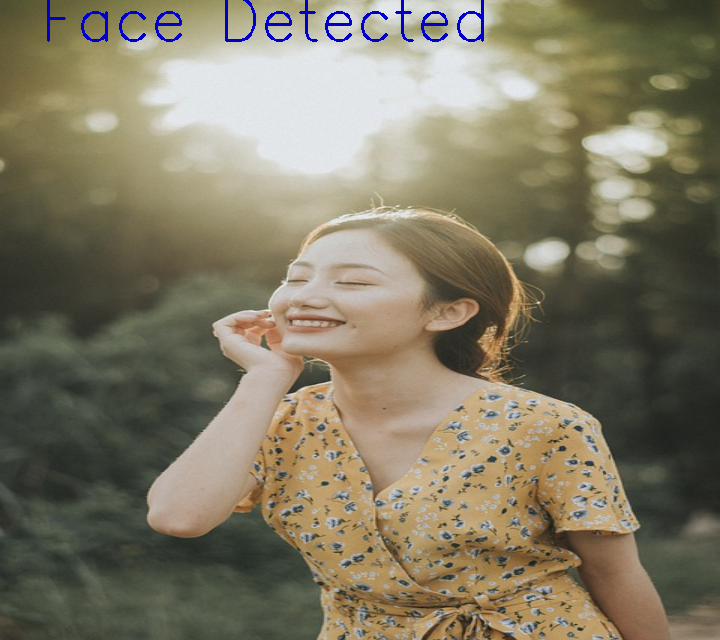

In [ ]:
# If no face detected
if not faces:
   mssg="Face Detected"
   cv2.putText(img,f'{mssg}',(40,40),cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2)
   cv2_imshow(img)
   cv2.waitKey(0)

else:
  # Bounding the face
  for face in faces:
    # extracting the face co-ordinates
    x=face.left()
    y=face.top()
    x2=face.right()
    y2=face.bottom()
    # rescaling those coordinates for our image
    box=[x,y,x2,y2]
    Boxes.append(box)
    cv2.rectangle(frame, (x, y), (x2, y2), (00, 200, 200),2)

  for box in Boxes:
        face = frame[box[1]:box[3], box[0]:box[2]]

  for box in Boxes:
        face = frame[box[1]:box[3], box[0]:box[2]]

        # ----- Image preprocessing --------#
        blob = cv2.dnn.blobFromImage(
            face, 1.0, (227, 227), model_mean, swapRB=False)



**STEP 4:Age Prediction**

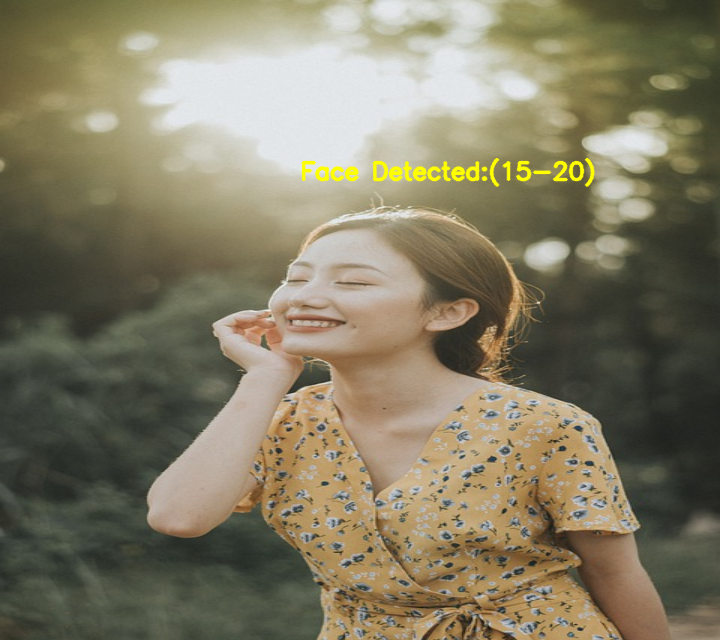

-1

In [ ]:
 # -------Age Prediction---------#
age_Net.setInput(blob)
age_preds = age_Net.forward()
age = ageList[age_preds[0].argmax()]

cv2.putText(frame, f'{mssg}:{age}', (box[0], box[1] - 10),
cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
cv2_imshow(frame)
cv2.waitKey(0)